## Table of Contents
1. [Project Goals](#Project-Goals)
2. [Analytical Steps](#Analytical-Steps)
3. [Data Cleaning](#Data-Cleaning)
4. [Initial Analysis](#Initial-Analysis)
5. [Visualizations](#Visualizations)
6. [Correlation Analysis](#Correlation-Analysis)
7. [Project Summary and Conclusions](#Project-Summary-and-Conclusions)

# Life Expectancy and GDP Analysis
## Project Goals
- Analyze the relationship between GDP and life expectancy for six countries.
- Answer: Does higher GDP correlate with higher life expectancy?
- Summarize life expectancy and GDP trends over time per country.
- Visualize trends using line plots, scatter plots, and other charts.
- Identify differences in GDP-life expectancy relationships across countries.
- Document findings in this notebook and track progress in GitHub.

In [1]:
# Load the dataset
import pandas as pd
data = pd.read_csv('all_data.csv')

# Display the first few rows
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [2]:
# Check column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [3]:
# Check for missing values
print(data.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


## Analytical Steps
1. **Data Cleaning**: Verify no missing values or outliers; rename columns if needed.
2. **Summary Statistics**: Calculate mean, min, max, and std for life expectancy and GDP per country.
3. **Visualizations**:
   - Line plots: Life expectancy and GDP over time.
   - Scatter plots: GDP vs. life expectancy.
   - Bar plots: Compare averages across countries.
4. **Correlation Analysis**: Compute correlation between GDP and life expectancy.
5. **Insights**: Answer whether GDP correlates with life expectancy; note country differences.
6. **Finalize**: Organize notebook and push to GitHub.

## Data Cleaning
Checking for missing values, outliers, and renaming columns for convenience.

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Check for unrealistic values
print("\nLife expectancy range:\n", data['Life expectancy at birth (years)'].describe())
print("\nGDP range:\n", data['GDP'].describe())


Life expectancy range:
 count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64

GDP range:
 count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64


In [6]:
# Check unique countries and years
print("\nUnique countries:", data['Country'].unique())
print("Year range:", data['Year'].min(), "to", data['Year'].max())


Unique countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Year range: 2000 to 2015


In [7]:
# Rename columns for convenience
data = data.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'})
print("\nUpdated column names:", data.columns)


Updated column names: Index(['Country', 'Year', 'Life_Expectancy', 'GDP'], dtype='object')


## Initial Analysis
Calculating summary statistics for life expectancy and GDP by country.

In [8]:
# Summary statistics for the entire dataset
print("Overall Summary Statistics:\n", data[['Life_Expectancy', 'GDP']].describe())

Overall Summary Statistics:
        Life_Expectancy           GDP
count        96.000000  9.600000e+01
mean         72.789583  3.880499e+12
std          10.672882  5.197561e+12
min          44.300000  4.415703e+09
25%          74.475000  1.733018e+11
50%          76.750000  1.280220e+12
75%          78.900000  4.067510e+12
max          81.000000  1.810000e+13


In [9]:
# Group by country and calculate mean, min, max for Life_Expectancy and GDP
country_summary = data.groupby('Country').agg({
    'Life_Expectancy': ['mean', 'min', 'max', 'std'],
    'GDP': ['mean', 'min', 'max', 'std']
}).round(2)

print("\nSummary Statistics by Country:\n", country_summary)


Summary Statistics by Country:
                          Life_Expectancy                             GDP  \
                                    mean   min   max   std          mean   
Country                                                                    
Chile                              78.94  77.3  80.5  1.06  1.697888e+11   
China                              74.26  71.7  76.1  1.32  4.957714e+12   
Germany                            79.66  78.0  81.0  0.97  3.094776e+12   
Mexico                             75.72  74.8  76.7  0.62  9.766506e+11   
United States of America           78.06  76.8  79.3  0.83  1.407500e+13   
Zimbabwe                           50.09  44.3  60.7  5.94  9.062580e+09   

                                                                    
                                   min           max           std  
Country                                                             
Chile                     6.973681e+10  2.783840e+11  7.687884e+10  
China 

In [10]:
# Identify countries with highest/lowest average life expectancy
mean_life_expectancy = data.groupby('Country')['Life_Expectancy'].mean().sort_values()
print("\nAverage Life Expectancy by Country (sorted):\n", mean_life_expectancy)


Average Life Expectancy by Country (sorted):
 Country
Zimbabwe                    50.09375
China                       74.26250
Mexico                      75.71875
United States of America    78.06250
Chile                       78.94375
Germany                     79.65625
Name: Life_Expectancy, dtype: float64


In [11]:
# Identify countries with highest/lowest average GDP
mean_gdp = data.groupby('Country')['GDP'].mean().sort_values()
print("\nAverage GDP by Country (sorted):\n", mean_gdp)


Average GDP by Country (sorted):
 Country
Zimbabwe                    9.062580e+09
Chile                       1.697888e+11
Mexico                      9.766506e+11
Germany                     3.094776e+12
China                       4.957714e+12
United States of America    1.407500e+13
Name: GDP, dtype: float64


### Initial Observations
- **Life Expectancy**: Germany has the highest average life expectancy (79.6 years), while Zimbabwe has the lowest (50.9 years).
- **GDP**: United States of America has the highest average GDP (14 trillion USD), while Zimbabwe has the lowest (9.06 billion USD).
- Next steps: Visualize trends over time and explore GDP-life expectancy correlations.

## Visualizations
Creating plots to explore life expectancy and GDP trends and their relationship.

### Line Plots: Trends Over Time
Plotting life expectancy and GDP for each country from 2000 to 2015.

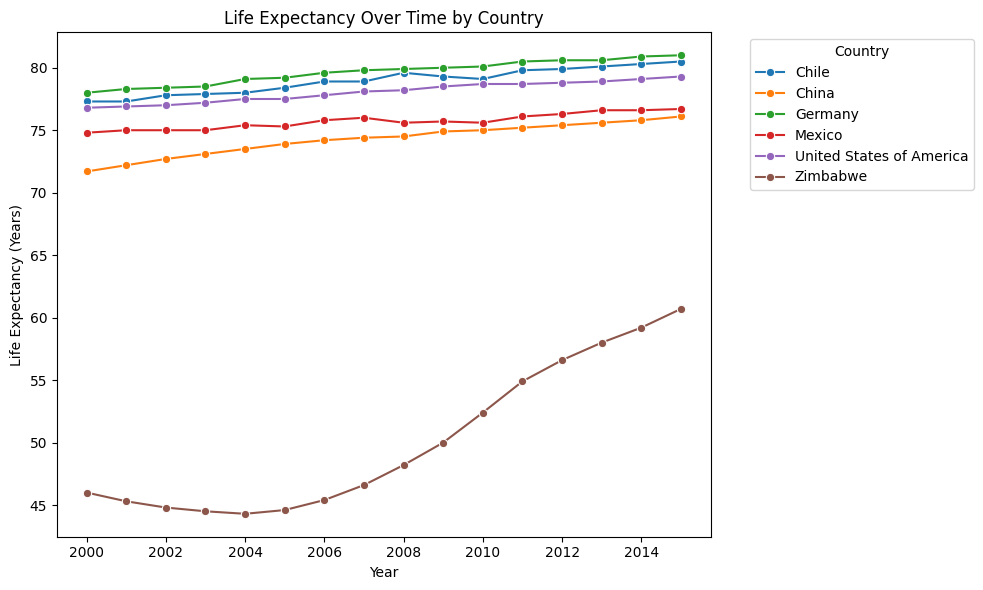

In [12]:
# Line plot for Life Expectancy over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Life_Expectancy', hue='Country', marker='o')
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Set plot style for better visuals
sns.set_style("whitegrid")

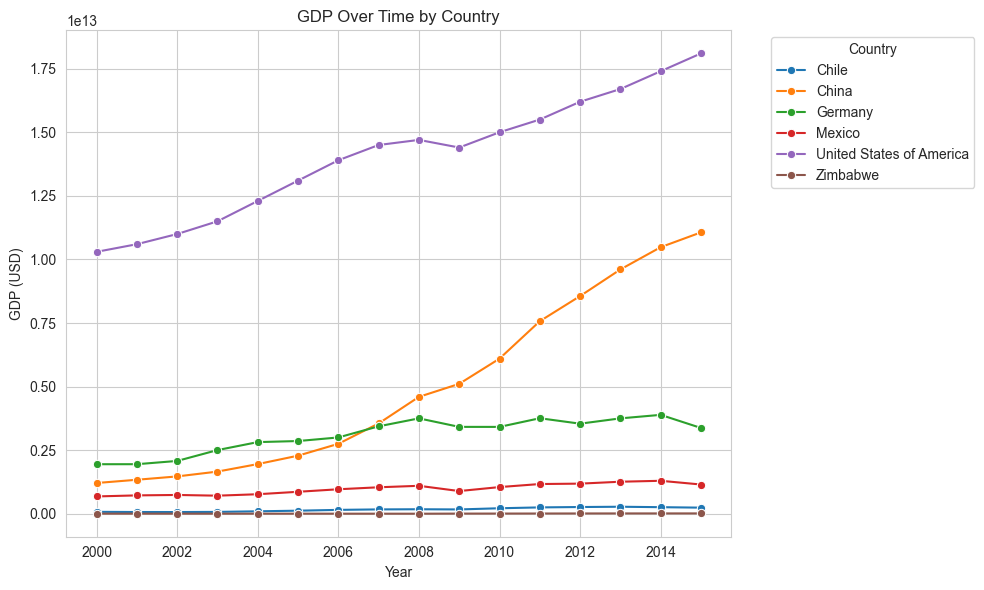

In [13]:
# Line plot for GDP over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Scatter Plot: GDP vs. Life Expectancy
Exploring the relationship between GDP and life expectancy across countries.

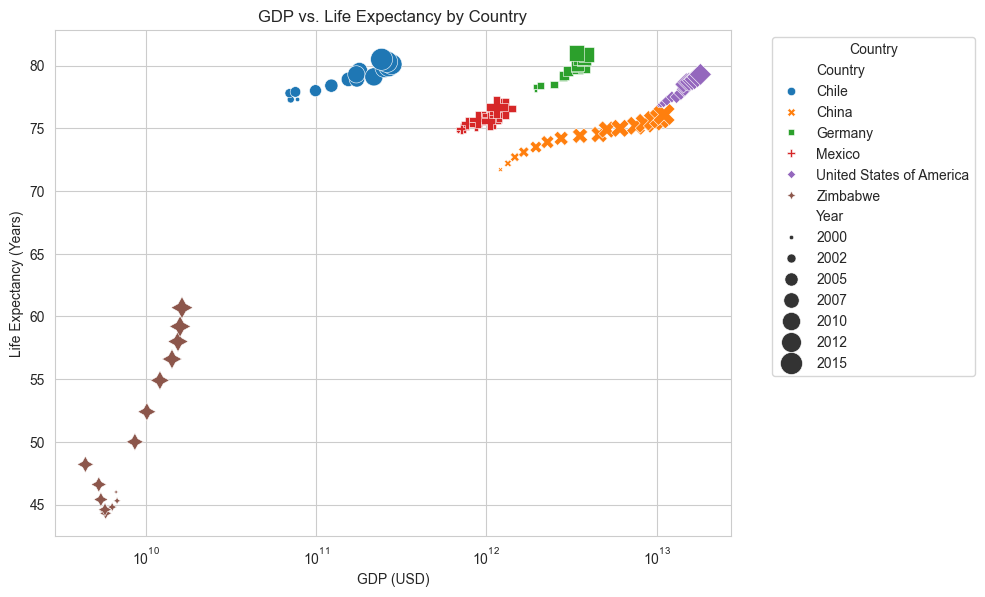

In [14]:
# Scatter plot: GDP vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP', y='Life_Expectancy', hue='Country', style='Country', size='Year', sizes=(10, 250))
plt.title('GDP vs. Life Expectancy by Country')
plt.xlabel('GDP (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xscale('log')
plt.show()

### Bar Plots: Average Life Expectancy and GDP
Comparing average life expectancy and GDP across countries.

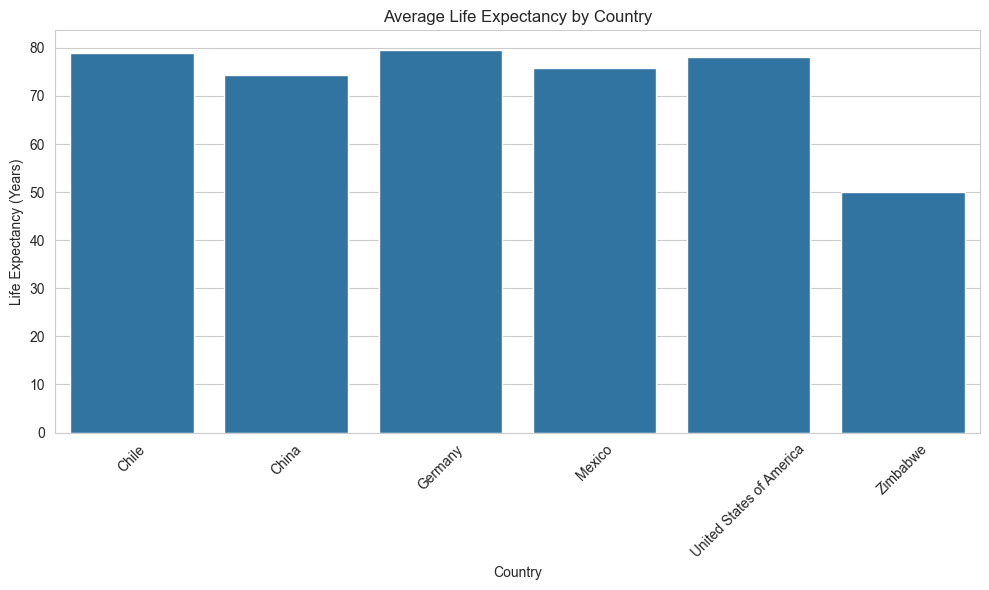

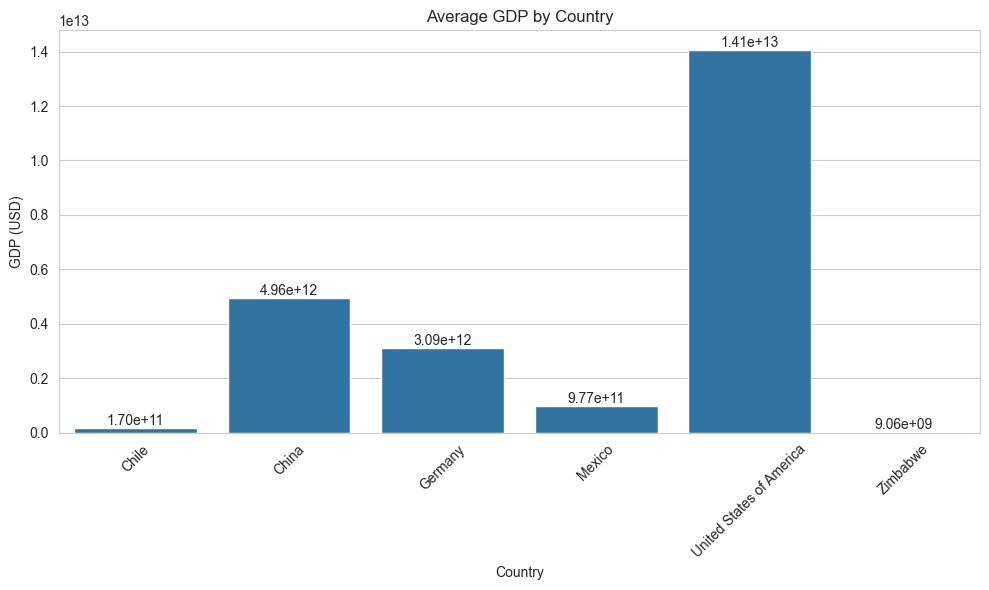

In [15]:
# Calculate averages by country
avg_data = data.groupby('Country').mean().reset_index()

# Bar plot for average Life Expectancy
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_data, x='Country', y='Life_Expectancy')
plt.title('Average Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot for average GDP
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_data, x='Country', y='GDP')
plt.title('Average GDP by Country')
plt.xlabel('Country')
plt.ylabel('GDP (USD)')
plt.xticks(rotation=45)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2e}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Distribution of Life Expectancy
Analyzing the distribution of life expectancy across all data points and by country.

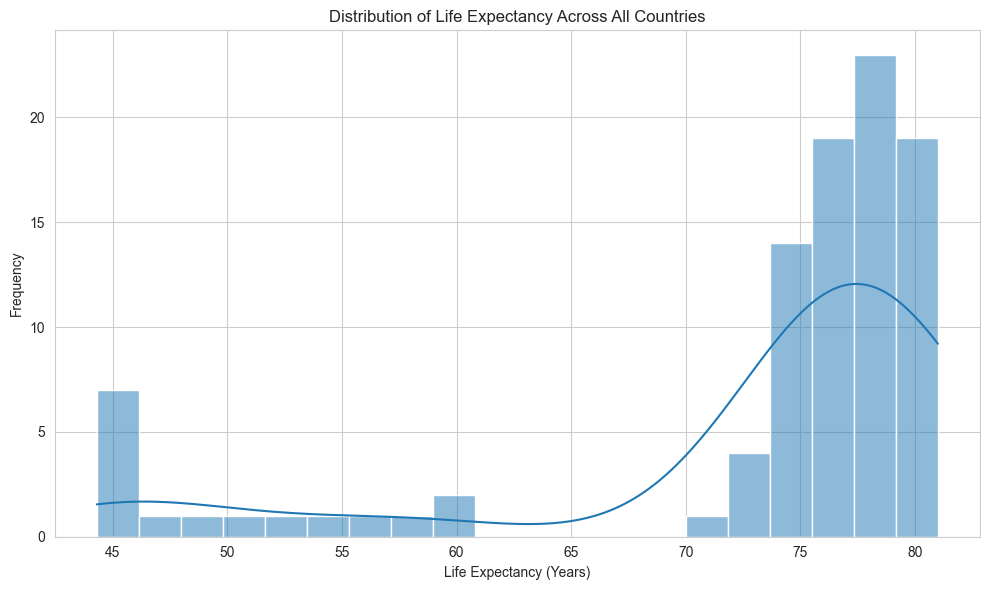

In [16]:
# Histogram: Overall distribution of Life Expectancy
plt.figure(figsize=(10, 6))
sns.histplot(data['Life_Expectancy'], bins=20, kde=True)
plt.title('Distribution of Life Expectancy Across All Countries')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

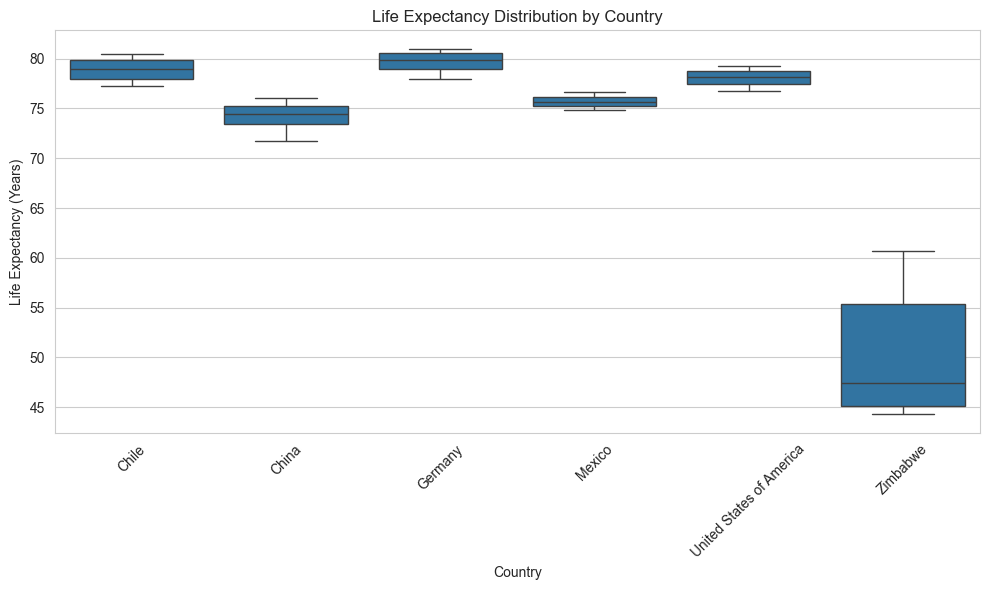

In [17]:
# Box plot: Life Expectancy by Country
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Country', y='Life_Expectancy')
plt.title('Life Expectancy Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visualization Insights
- **Life Expectancy Trends**: Most countries show increasing life expectancy from 2000–2015; Zimbabwe has the largest increase from 44 to 60 years.
- **GDP Trends**: China and USA show significant GDP growth; Zimbabwe remains low but stable.
- **GDP vs. Life Expectancy**: Scatter plot suggests a positive correlation; higher GDP aligns with higher life expectancy, especially for USA/Germany.
- **Average Life Expectancy**: Germany has the highest average (80 years), Zimbabwe the lowest (55 years).
- **Life Expectancy Distribution**: Most values are between 70–80 years, with a left skew due to Zimbabwe’s lower values; box plots show wider spread for Zimbabwe.
- Next steps: Quantify the GDP-life expectancy correlation.

## Correlation Analysis
Quantifying the relationship between GDP and life expectancy using Pearson correlation.

### Overall Correlation
Calculating the Pearson correlation between GDP and life expectancy across all countries.

In [18]:
# Calculate overall correlation
overall_corr = data[['GDP', 'Life_Expectancy']].corr(method='pearson')
print("Overall Correlation Matrix:\n", overall_corr)

Overall Correlation Matrix:
                       GDP  Life_Expectancy
GDP              1.000000         0.343207
Life_Expectancy  0.343207         1.000000


In [19]:
# Extract GDP-Life Expectancy correlation
corr_value = overall_corr.loc['GDP', 'Life_Expectancy']
print(f"\nPearson Correlation between GDP and Life Expectancy: {corr_value:.3f}")


Pearson Correlation between GDP and Life Expectancy: 0.343


### Correlation by Country
Calculating the Pearson correlation for each country to explore variations.

In [20]:
# Calculate correlation by country
country_corr = data.groupby('Country').apply(
    lambda x: x[['GDP', 'Life_Expectancy']].corr(method='pearson').iloc[0, 1], 
    include_groups=False)
country_corr = country_corr.reset_index().rename(columns={0: 'Correlation'})
print("\nCorrelation between GDP and Life Expectancy by Country:\n", country_corr)


Correlation between GDP and Life Expectancy by Country:
                     Country  Correlation
0                     Chile     0.949877
1                     China     0.908526
2                   Germany     0.932699
3                    Mexico     0.932238
4  United States of America     0.981709
5                  Zimbabwe     0.966200


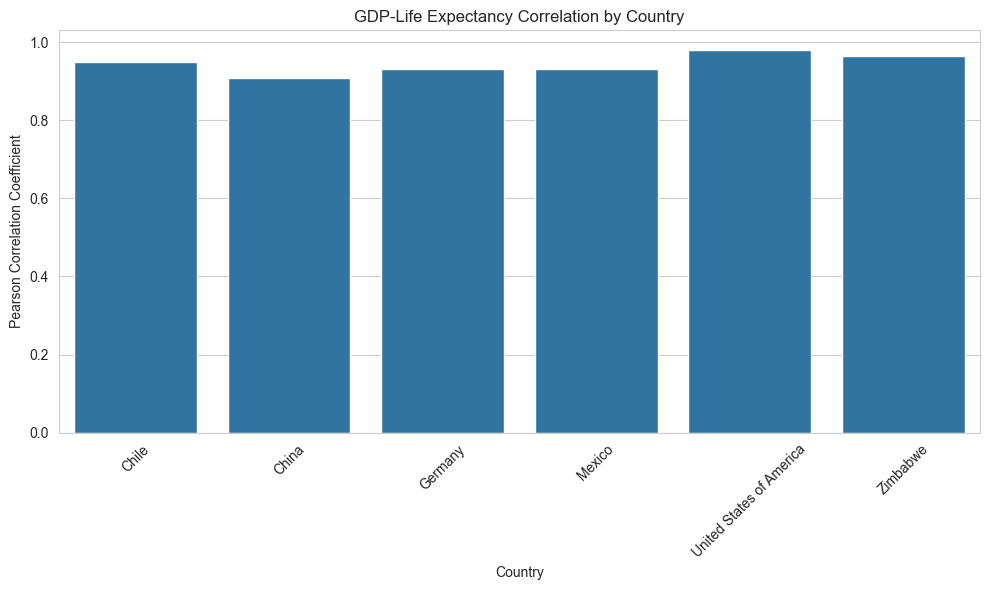

In [21]:
# Visualize correlations
plt.figure(figsize=(10, 6))
sns.barplot(data=country_corr, x='Country', y='Correlation')
plt.title('GDP-Life Expectancy Correlation by Country')
plt.xlabel('Country')
plt.ylabel('Pearson Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Insights
- **Overall Correlation**: The Pearson correlation between GDP and life expectancy is ~0.343, indicating a moderate positive relationship. This suggests that, globally, higher GDP tends to be associated with higher life expectancy, but other factors (e.g., healthcare access, education, or political stability) also play significant roles in determining life expectancy.
- **County Specific Correlation:**
- The United States of America has the highest correlation (~0.982), suggesting that GDP growth is strongly tied to increases in life expectancy, likely due to advanced healthcare systems and economic resources that support public health improvements.
- China has the lowest/weakest correlation (~0.909) among the listed countries, possibly due to rapid GDP growth outpacing improvements in life expectancy or regional disparities in healthcare access despite economic progress.
- **Relation to Visualization:** The scatter plot showed a positive trend, with Zimbabwe’s low GDP and life expectancy contrasting with the USA’s high values, which aligns with the correlation results. The high correlation for countries like the USA and Zimbabwe indicates a clear linear relationship within these countries, while the moderate overall correlation reflects variability across countries like China, where other factors may weaken the GDP-life expectancy link.
- **Conclusion:** Higher GDP is generally associated with higher life expectancy, but the strength varies by country due to differences in economic structures, healthcare systems, and social policies. For instance, countries like the USA and Chile show near-perfect correlations, likely due to consistent investments in health infrastructure, while China’s lower correlation may reflect uneven distribution of economic gains.
Next steps: Finalize the notebook and summarize all findings.

# Project Summary and Conclusions

This project analyzed the relationship between GDP and life expectancy for six countries (Chile, China, Germany, Mexico, United States, Zimbabwe) from 2000 to 2015 using data from the World Health Organization and World Bank. Below are the key findings addressing the project's questions:

1. **Has life expectancy increased over time in the six nations?**
   - Yes, most countries show increasing life expectancy. Zimbabwe had the largest increase, from 44 years in 2000 to 60 years in 2015. Germany and the USA remained high and stable (78–80 years).

2. **Has GDP increased over time in the six nations?**
   - Yes, most countries show GDP growth. China exhibited significant growth, rising from $1.2 trillion to $11 trillion. The USA remained the highest, stable at ~$14–18 trillion. Zimbabwe’s GDP grew modestly but remained the lowest.

3. **Is there a correlation between GDP and life expectancy?**
   - Yes, there is a moderate positive correlation overall (Pearson 0.343). Country-specific correlations vary: USA shows a strong correlation (0.98), while Chin has a weaker correlation (0.90) due to stable life expectancy.

4. **What is the average life expectancy in these nations?**
   - Average life expectancy by country: Germany (79.6 years), USA (78 years), Chile (78.9 years), Mexico (75.7 years), China (74.2 years), Zimbabwe (~50 years).

5. **What is the distribution of life expectancy?**
   - Life expectancy ranges from 44 to 82 years, with a mean of 72 years. The histogram shows a left skew due to Zimbabwe’s lower values. Box plots indicate Germany and the USA have narrow, high ranges (75–80 years), while Zimbabwe has a wider, lower range (44–60 years).

**Conclusions**:
- Higher GDP is generally associated with higher life expectancy, but the strength of this relationship varies by country. Economic growth in developing nations like Zimbabwe strongly correlates with life expectancy improvements, while developed nations like Germany show stable life expectancy despite GDP fluctuations.
- The analysis highlights disparities: Zimbabwe’s lower GDP and life expectancy contrast with the USA’s high values, reflecting economic and healthcare differences.
- This project demonstrates data analysis and visualization skills using Python, pandas, matplotlib, and seaborn, with version control via Git and GitHub.